#**SVM Algorithm Assignment**

Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

**Data :** SalaryData


##**Importing Necessary Libraries**

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## **Importing Data**

In [2]:
Train = pd.read_csv('SalaryData_Train.csv')
Test = pd.read_csv('SalaryData_Test.csv')

In [3]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## **Initial Analysis**

In [5]:
Train.shape,Test.shape

((30161, 14), (15060, 14))

In [6]:
Train.dtypes,Test.dtypes

(age               int64
 workclass        object
 education        object
 educationno       int64
 maritalstatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalgain       int64
 capitalloss       int64
 hoursperweek      int64
 native           object
 Salary           object
 dtype: object, age               int64
 workclass        object
 education        object
 educationno       int64
 maritalstatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalgain       int64
 capitalloss       int64
 hoursperweek      int64
 native           object
 Salary           object
 dtype: object)

In [7]:
Train.isna().sum(),Test.isna().sum()

(age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64, age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64)

In [9]:
Train['native'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [10]:
Train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [19]:
import warnings
warnings.filterwarnings('ignore')

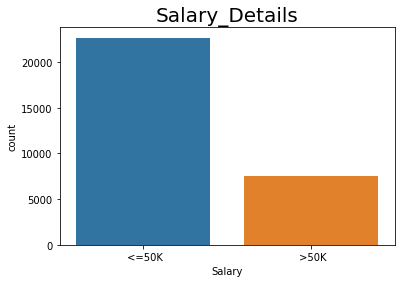

In [44]:
sns.countplot(Train['Salary'])
plt.title('Salary_Details',size = 20)
plt.show()

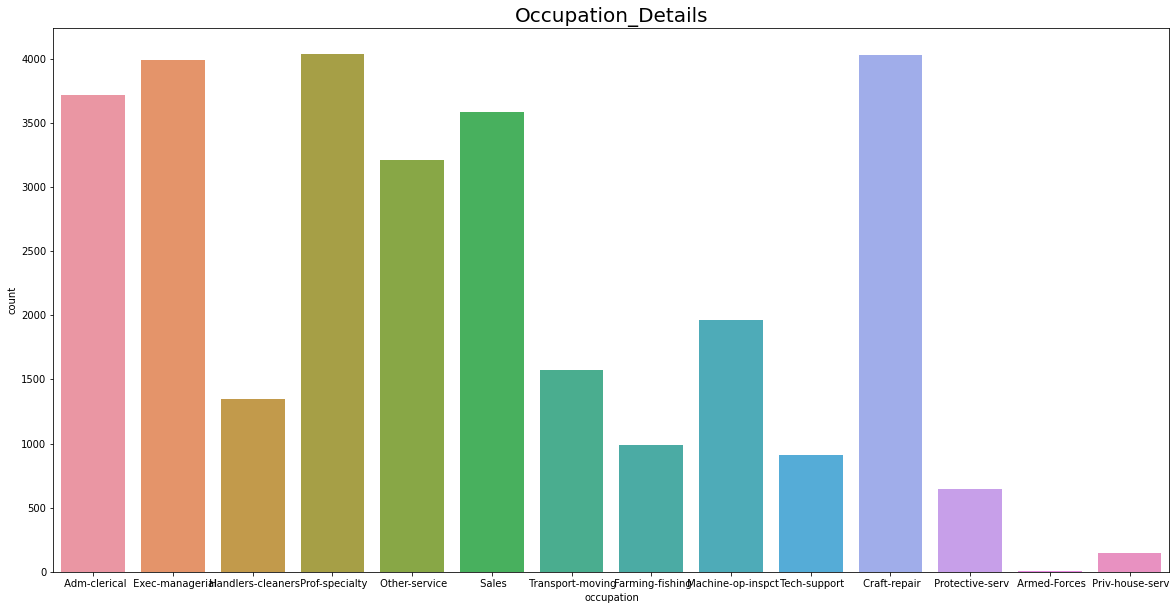

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(Train['occupation'])
plt.title('Occupation_Details',size = 20)
plt.show()

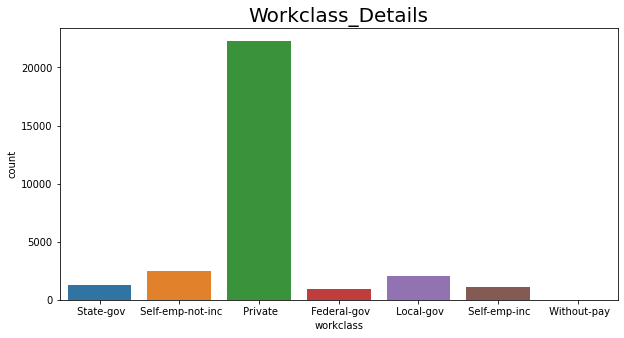

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(Train['workclass'])
plt.title('Workclass_Details',size = 20)
plt.show()

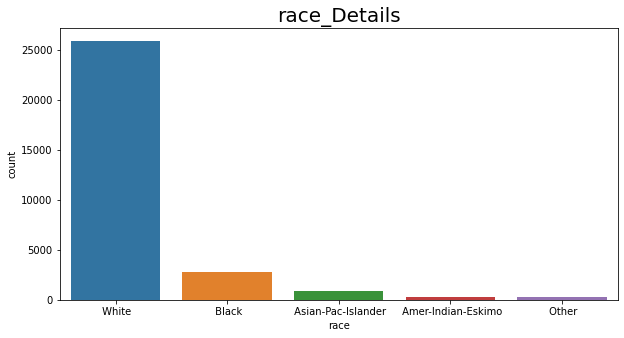

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(Train['race'])
plt.title('race_Details',size = 20)
plt.show()

## **Data Preparation**

In [47]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [48]:
Train['Salary'] = Label_Encoder.fit_transform(Train['Salary'] )
Train['sex'] = Label_Encoder.fit_transform(Train['sex'] )

In [49]:
Test['Salary'] = Label_Encoder.fit_transform(Test['Salary'] )
Test['sex'] = Label_Encoder.fit_transform(Test['sex'] )

In [50]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0


In [51]:
Train['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [52]:
Train['sex'].value_counts()

1    20380
0     9781
Name: sex, dtype: int64

In [53]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,1,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,United-States,0


In [54]:
Train_data = pd.get_dummies(Train)

In [55]:
Train_data

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,1,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,1,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,1,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,1,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,0,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30157,40,9,1,0,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30159,22,9,1,0,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
Test_data = pd.get_dummies(Test)

In [57]:
Test_data

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,1,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,12,1,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44,10,1,7688,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,34,6,1,0,0,30,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,1,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,0,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15057,38,13,1,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15058,44,13,1,5455,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## **Model Building**

In [58]:
X_Train = Train_data.drop(labels='Salary', axis=1)
Y_Train = Train_data[['Salary']]

In [59]:
X_Test = Test_data.drop(labels='Salary', axis=1)
Y_Test = Test_data[['Salary']]

In [60]:
X_Train.shape,Y_Train.shape

((30161, 101), (30161, 1))

In [61]:
X_Test.shape,Y_Test.shape

((15060, 101), (15060, 1))

In [62]:
from sklearn.svm import SVC
SVM_Model = SVC(class_weight=None,random_state=12)


## **Model Training**

In [63]:
SVM_Model.fit(X_Train,Y_Train)

SVC(random_state=12)

## **Model Testing**

In [64]:
Y_Train_Pred = SVM_Model.predict(X_Train)

In [65]:
Y_Train_Pred = pd.DataFrame(Y_Train_Pred)

In [66]:
Y_Train_Pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,0
30158,0
30159,0


In [67]:
Y_Test_Pred = SVM_Model.predict(X_Test)
Y_Test_Pred = pd.DataFrame(Y_Test_Pred )

In [68]:
Y_Test_Pred

,0
0,0
1,0
2,0
3,1
4,0
...,...
15055,0
15056,0
15057,0
15058,0


## **Model Evaluation**

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

#### **Training Data**

In [115]:
accuracy_score(Y_Train,Y_Train_Pred)

0.7960279831570571

In [116]:
confusion_matrix(Y_Train,Y_Train_Pred)

array([[21950,   703],
       [ 5449,  2059]])

In [117]:
precision_score(Y_Train,Y_Train_Pred)

0.7454742939898624

In [118]:
recall_score(Y_Train,Y_Train_Pred)

0.2742408098028769

#### **Test Data**

In [119]:
accuracy_score(Y_Test,Y_Test_Pred)

0.7964143426294821

In [120]:
confusion_matrix(Y_Test,Y_Test_Pred)

array([[10997,   363],
       [ 2703,   997]])

In [121]:
precision_score(Y_Test,Y_Test_Pred)

0.7330882352941176

In [122]:
recall_score(Y_Test,Y_Test_Pred)

0.2694594594594595

## **Model Deployement**

In [123]:
from pickle import dump

In [79]:
dump(SVM_Model,open('SVM_model_pkl','wb'))

In [80]:
from pickle import load

In [81]:
SVM_Model_Pickle = load(open('SVM_model_pkl','rb'))

In [82]:
Pickle_Pred = SVM_Model_Pickle.predict(X_Test)

#**Support Vector Machine - Forest Fires**
classify the Size_Categorie using SVM

month month of the year: 'jan' to 'dec'

day day of the week: 'mon' to 'sun'

FFMC FFMC index from the FWI system: 18.7 to 96.20

DMC DMC index from the FWI system: 1.1 to 291.3

DC DC index from the FWI system: 7.9 to 860.6

ISI ISI index from the FWI system: 0.0 to 56.10

temp temperature in Celsius degrees: 2.2 to 33.30

RH relative humidity in %: 15.0 to 100

wind wind speed in km/h: 0.40 to 9.40

rain outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie the burned area of the forest ( Small , Large)



In [293]:
dataset = pd.read_csv('forestfires.csv')
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [298]:
dataset['month'] =  dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12))
dataset['day'] =  dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7))


In [299]:
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [300]:
dataset.shape

(517, 31)

In [301]:
dataset.dtypes

month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [302]:
dataset = dataset.drop(['monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthapr','monthoct','monthsep'],axis='columns')

In [303]:
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,large
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,large
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,large
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,small


In [304]:
dataset = dataset.drop(['dayfri','daymon','daysat','daysun','daythu','daytue','daywed'],axis='columns')

In [305]:
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [306]:
dataset.dtypes

month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
size_category     object
dtype: object

In [307]:
dataset = pd.get_dummies(dataset,columns=['size_category'],drop_first=True)

In [308]:
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category_small
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [309]:
dataset.dtypes

month                    int64
day                      int64
FFMC                   float64
DMC                    float64
DC                     float64
ISI                    float64
temp                   float64
RH                       int64
wind                   float64
rain                   float64
area                   float64
size_category_small      uint8
dtype: object

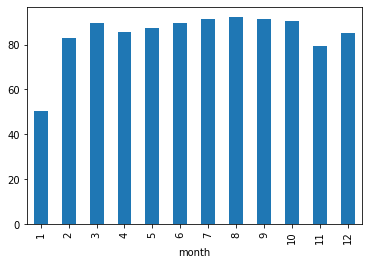

In [310]:
dataset.groupby('month').FFMC.mean().plot(kind='bar')
plt.show()

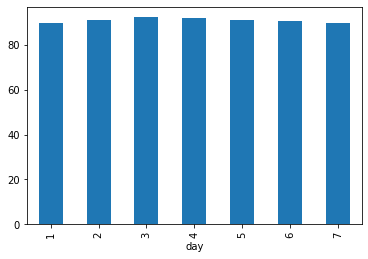

In [311]:
dataset.groupby('day').FFMC.mean().plot(kind='bar')
plt.show()

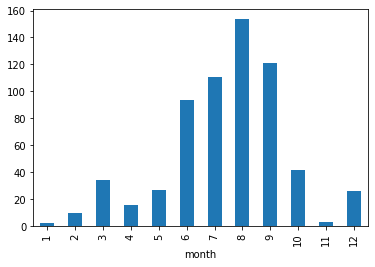

In [312]:
dataset.groupby('month').DMC.mean().plot(kind='bar')
plt.show()

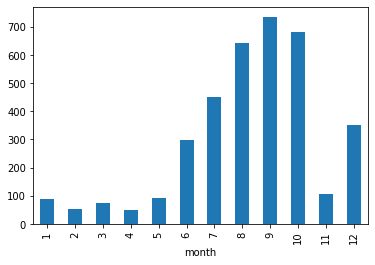

In [313]:
dataset.groupby('month').DC.mean().plot(kind='bar')
plt.show()

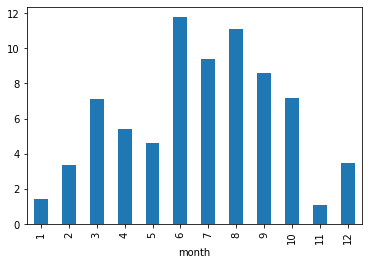

In [314]:
dataset.groupby('month').ISI.mean().plot(kind='bar')
plt.show()

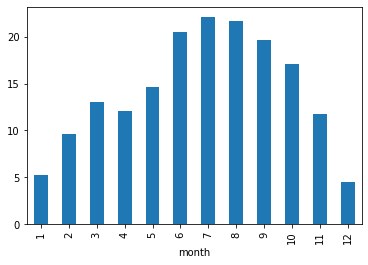

In [315]:
dataset.groupby('month').temp.mean().plot(kind='bar')
plt.show()

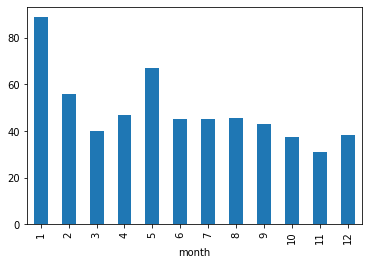

In [316]:
dataset.groupby('month').RH.mean().plot(kind='bar')
plt.show()

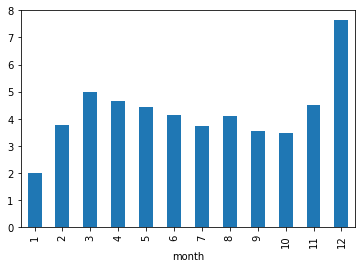

In [317]:
dataset.groupby('month').wind.mean().plot(kind='bar')
plt.show()

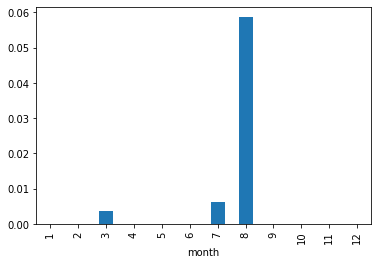

In [318]:
dataset.groupby('month').rain.mean().plot(kind='bar')
plt.show()

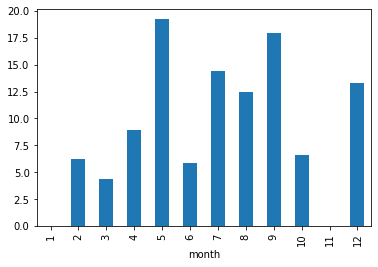

In [319]:
dataset.groupby('month').area.mean().plot(kind='bar')
plt.show()

## **Model Building**

In [420]:
x = dataset[['day','FFMC','DMC','DC','temp','RH','size_category_small']]
y = dataset[['month']]

In [421]:
x

,day,FFMC,DMC,DC,temp,RH,size_category_small
0,5,86.2,26.2,94.3,8.2,51,1
1,2,90.6,35.4,669.1,18.0,33,1
2,6,90.6,43.7,686.9,14.6,33,1
3,5,91.7,33.3,77.5,8.3,97,1
4,7,89.3,51.3,102.2,11.4,99,1
...,...,...,...,...,...,...,...
512,7,81.6,56.7,665.6,27.8,32,0
513,7,81.6,56.7,665.6,21.9,71,0
514,7,81.6,56.7,665.6,21.2,70,0
515,6,94.4,146.0,614.7,25.6,42,1


In [422]:
y

,month
0,3
1,10
2,10
3,3
4,3
...,...
512,8
513,8
514,8
515,8


In [423]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.20,random_state = 12)

In [424]:
X_train.shape,X_test.shape

((413, 7), (104, 7))

In [425]:
X_train.dtypes

day                      int64
FFMC                   float64
DMC                    float64
DC                     float64
temp                   float64
RH                       int64
size_category_small      uint8
dtype: object

In [426]:
Y_train.shape,Y_test.shape

((413, 1), (104, 1))

## **Model Training**

In [427]:
SVM_Model_1 = SVC(class_weight=None,random_state=12)
SVM_Model_1.fit(X_train,Y_train)

SVC(random_state=12)

##**Model Testing**

Train Data

In [428]:
Y_train_pred = SVM_Model_1.predict(X_train)

In [429]:
Y_train_pred

array([3, 7, 9, 8, 8, 7, 3, 8, 9, 3, 3, 9, 9, 9, 3, 9, 8, 8, 3, 9, 3, 9,
       9, 9, 8, 7, 7, 9, 6, 8, 7, 8, 9, 8, 9, 9, 7, 3, 7, 8, 8, 9, 7, 8,
       8, 9, 9, 8, 8, 8, 9, 8, 7, 9, 8, 7, 3, 9, 8, 9, 8, 9, 8, 9, 8, 8,
       7, 9, 9, 8, 9, 9, 8, 7, 7, 9, 9, 8, 9, 8, 8, 8, 8, 8, 9, 3, 8, 8,
       9, 8, 7, 8, 8, 8, 9, 9, 3, 7, 8, 9, 8, 3, 6, 8, 7, 9, 9, 8, 8, 8,
       7, 3, 8, 9, 3, 3, 9, 9, 8, 3, 8, 3, 8, 9, 9, 9, 8, 8, 9, 8, 9, 8,
       3, 9, 9, 9, 3, 9, 3, 9, 8, 3, 9, 8, 8, 9, 9, 3, 7, 8, 8, 8, 8, 3,
       9, 8, 3, 9, 9, 9, 7, 3, 8, 8, 9, 9, 9, 8, 7, 8, 9, 9, 3, 9, 8, 9,
       8, 9, 8, 3, 7, 3, 8, 9, 8, 9, 8, 9, 8, 9, 9, 9, 9, 8, 9, 9, 9, 9,
       9, 8, 9, 3, 7, 9, 9, 9, 9, 3, 9, 8, 8, 8, 3, 7, 9, 9, 8, 9, 9, 8,
       8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 8, 3, 7, 8, 7, 9, 8, 9, 9, 8,
       7, 8, 7, 9, 9, 8, 9, 3, 9, 9, 3, 9, 9, 8, 9, 7, 7, 3, 3, 8, 8, 9,
       8, 9, 3, 3, 8, 7, 3, 3, 9, 3, 8, 9, 3, 9, 8, 9, 9, 8, 3, 7, 9, 8,
       3, 9, 8, 3, 8, 8, 9, 9, 8, 3, 9, 9, 8, 9, 3,

Test Data

In [430]:
Y_test_pred = SVM_Model_1.predict(X_test)

In [431]:
Y_test_pred

array([7, 8, 9, 7, 8, 8, 8, 8, 7, 9, 8, 3, 8, 9, 9, 8, 7, 9, 8, 8, 9, 8,
       8, 9, 9, 8, 8, 9, 9, 9, 8, 9, 8, 3, 3, 3, 9, 8, 9, 9, 9, 9, 9, 9,
       8, 7, 8, 8, 8, 7, 8, 8, 8, 9, 6, 3, 9, 9, 8, 9, 9, 3, 8, 9, 9, 9,
       8, 7, 9, 8, 9, 8, 8, 8, 3, 8, 9, 8, 9, 7, 8, 8, 9, 7, 7, 3, 9, 9,
       3, 9, 9, 8, 7, 3, 9, 3, 8, 8, 7, 8, 9, 9, 9, 9])

## **Model Evaluation**

In [444]:
from sklearn.metrics import accuracy_score

Training Data

In [445]:
accuracy_score(Y_train,Y_train_pred)

0.801452784503632

Test Data

In [446]:
accuracy_score(Y_test,Y_test_pred)

0.8173076923076923